# Target Variable

In [1]:
import pandas as pd
import numpy as np
# 결측치 제거
from sklearn.impute import SimpleImputer
# 정규화, 표준화
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# RFE
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
# PCA
from sklearn.decomposition import PCA
# regression feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# 시각화 Library
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [2]:
tips = pd.read_csv('tips2.csv', index_col=0)
tips.tail(5)

,total_bill,tip,sex,smoker,day,time,size
243,18.78,3.00,Female,No,Thur,Dinner,2.0
244,16.99,NaN,Female,No,Sun,Dinner,2.0
245,20.34,1.66,NaN,No,Sun,Dinner,3.0
246,13.23,2.66,Male,Yes,Sat,NaN,NaN
247,26.34,2.20,Female,No,Fri,Lunch,4.0


In [3]:
# 변수 형태 변환
tips['sex'].replace({'Female': 0, 'Male':1}, inplace=True)
tips['smoker'].replace({'No': 0, 'Yes':1}, inplace=True)
tips['day'].replace({'Thur': 0, 'Fri':1, 'Sat': 2, 'Sun': 3}, inplace=True)
tips['time'].replace({'Lunch': 0, 'Dinner':1}, inplace=True)
tips.tail(5)

,total_bill,tip,sex,smoker,day,time,size
243,18.78,3.00,0.0,0,0,1.0,2.0
244,16.99,NaN,0.0,0,3,1.0,2.0
245,20.34,1.66,NaN,0,3,1.0,3.0
246,13.23,2.66,1.0,1,2,NaN,NaN
247,26.34,2.20,0.0,0,1,0.0,4.0


In [4]:
# 결측치 제거
data = tips.values
imputer = SimpleImputer(strategy='median')
imputer.fit(data)
data_trans = imputer.transform(data)
tips_imp = pd.DataFrame(data_trans, columns=['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'])
tips_imp.tail(5)

,total_bill,tip,sex,smoker,day,time,size
243,18.78,3.00,0.0,0.0,0.0,1.0,2.0
244,16.99,2.83,0.0,0.0,3.0,1.0,2.0
245,20.34,1.66,1.0,0.0,3.0,1.0,3.0
246,13.23,2.66,1.0,1.0,2.0,1.0,2.0
247,26.34,2.20,0.0,0.0,1.0,0.0,4.0


In [5]:
# 결측치 여부 확인
tips_imp.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

파생변수 추가

In [6]:
# 파생변수 1. tip rate
tip_rate = (tips_imp.tip/tips_imp.total_bill).round(4)*100
tips_mut = tips_imp.copy()
tips_mut['tip_rate'] = tip_rate
'''
# 파생변수 2. 1인당 지불요금
tips_mut = tips_mut.assign(BPP=tips_imp["total_bill"] / tips_imp["size"])
'''
tips_mut

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,0.0,0.0,3.0,1.0,2.0,5.94
1,10.34,1.66,1.0,0.0,3.0,1.0,3.0,16.05
2,21.01,3.50,1.0,0.0,3.0,1.0,3.0,16.66
3,23.68,3.31,1.0,0.0,3.0,1.0,2.0,13.98
4,24.59,3.61,0.0,0.0,3.0,1.0,4.0,14.68
...,...,...,...,...,...,...,...,...
243,18.78,3.00,0.0,0.0,0.0,1.0,2.0,15.97
244,16.99,2.83,0.0,0.0,3.0,1.0,2.0,16.66
245,20.34,1.66,1.0,0.0,3.0,1.0,3.0,8.16
246,13.23,2.66,1.0,1.0,2.0,1.0,2.0,20.11


## 특징 추출 - 추가변수 없는 경우.

In [7]:
# 변수 종류 확인 - 추가변수 없음
tips_imp.columns.tolist()

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

In [8]:
# 목표변수 설정: tip(1)
n = 1
# 선택할 특징의 수 설정
m = 4

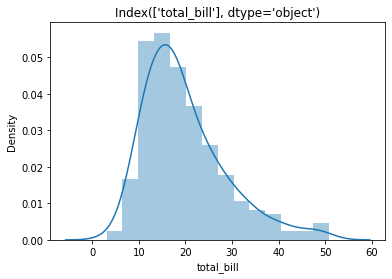

/opt/anaconda3/envs/multi/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


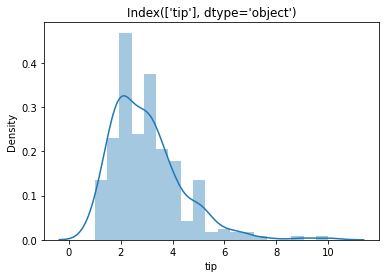

/opt/anaconda3/envs/multi/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


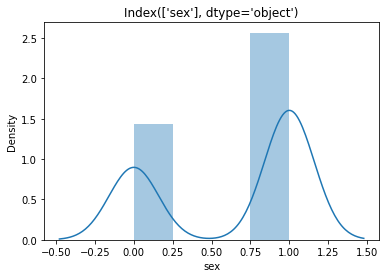

/opt/anaconda3/envs/multi/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


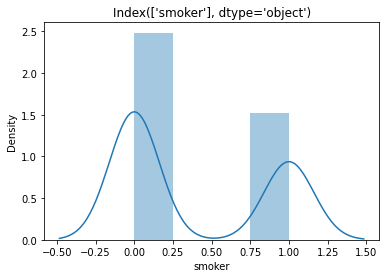

/opt/anaconda3/envs/multi/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


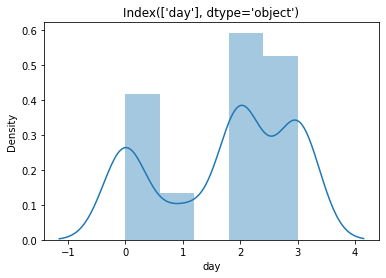

/opt/anaconda3/envs/multi/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


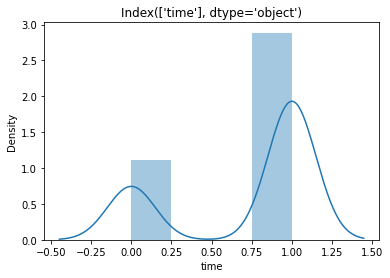

/opt/anaconda3/envs/multi/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


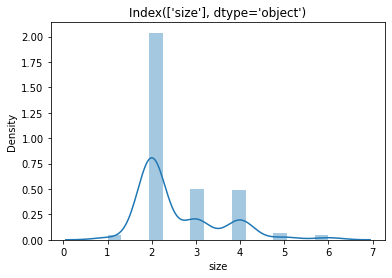

In [14]:
for i in range(tips_imp.shape[1]):
    sns.distplot(tips_imp.iloc[:,i])
    plt.title(tips_imp.columns[[i]])
    plt.show()

## RFE

In [19]:
# 목표변수 입력
y = tips_imp.iloc[:,n]
X = tips_imp.drop(tips_imp.columns[[n]], axis=1)
# 특징 추출
estimator = SVR(kernel="linear")
rfe = RFE(estimator, n_features_to_select=m)
rfe.fit(X, y)
for i in range(X.shape[1]):
    print('Column: %d, Rank: %d, Selected=%s' % (i, rfe.ranking_[i], rfe.support_[i]))

Column: 0, Rank: 1, Selected=True
Column: 1, Rank: 2, Selected=False
Column: 2, Rank: 3, Selected=False
Column: 3, Rank: 1, Selected=True
Column: 4, Rank: 1, Selected=True
Column: 5, Rank: 1, Selected=True


In [41]:
tips_RFE = tips_imp.copy()
for i in range(X.shape[1]):
    if rfe.support_[i] == False:
        if i < n:
            k = i
        else:
            k = i+1
        tips_RFE.drop(tips_imp.columns[[k]], axis=1,
                      inplace=True)
tips_RFE

,total_bill,tip,smoker,size,tip_rate
0,16.99,1.01,0.0,2.0,0.059447
1,10.34,1.66,0.0,3.0,0.160542
2,21.01,3.50,0.0,3.0,0.166587
3,23.68,3.31,0.0,2.0,0.139780
4,24.59,3.61,0.0,4.0,0.146808
...,...,...,...,...,...
243,18.78,3.00,0.0,2.0,0.159744
244,16.99,2.83,0.0,2.0,0.166569
245,20.34,1.66,0.0,3.0,0.081613
246,13.23,2.66,1.0,2.0,0.201058


In [42]:
tips_RFE.profile_report()

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [43]:
# 정규화
trans = MinMaxScaler()
tips_N = trans.fit_transform(tips_RFE)
tips_RFE_norm = pd.DataFrame(tips_N, columns=[tips_RFE.columns])
tips_RFE_norm.describe()

,total_bill,tip,smoker,size,tip_rate
count,248.000000,248.000000,248.000000,248.000000,248.000000
mean,0.349956,0.220847,0.379032,0.314516,0.184849
std,0.185412,0.152904,0.486127,0.189905,0.090464
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.215281,0.111111,0.000000,0.200000,0.136805
50%,0.308442,0.203333,0.000000,0.200000,0.176568
75%,0.441087,0.280000,1.000000,0.400000,0.230971
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
tips_RFE_norm.profile_report()

TypeError: Setting a MultiIndex dtype to anything other than object is not supported

In [ ]:
# 표준화
sc = StandardScaler()
tips_S = sc.fit_transform(tips_RFE)
tips_RFE_stan = pd.DataFrame(tips_S, columns=[tips_RFE.columns])
tips_RFE_stan.describe().round()

In [45]:
tips_RFE_stan.profile_report()

NameError: name 'tips_RFE_stan' is not defined

## PCA

In [20]:
pca = PCA(n_components=5)
pca.fit(tips_imp)
tips_PC = pca.transform(tips_imp).round(2)
tips_PC

array([[-2.99, -1.15,  1.79,  0.01, -0.83],
       [-9.44, -1.6 ,  0.23,  1.04,  0.11],
       [ 1.34, -1.34, -0.35,  0.26, -0.09],
       ...,
       [ 0.48, -1.24,  1.36,  0.68, -0.09],
       [-6.55, -0.53, -0.24, -0.41,  0.7 ],
       [ 6.49,  1.17,  1.11,  1.45, -0.51]])

Text(0.5, 1.0, 'PCA of IRIS dataset')

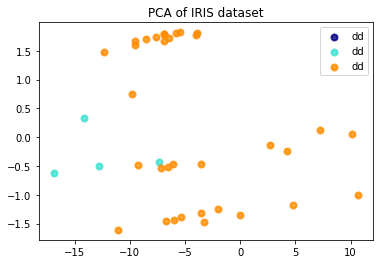

In [21]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i in zip(colors, [0,1,2]):
    plt.scatter(tips_PC[y == i, 0], tips_PC[y == i, 1], color=color,
                alpha=.8, lw=lw, label='dd')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

In [25]:
# eigen_vector 확인
pca.components_.round(2)

array([[-0.93, -0.08, -0.01, -0.  , -0.02, -0.01, -0.06,  0.35],
       [ 0.33,  0.18,  0.  ,  0.01,  0.02,  0.01,  0.03,  0.93],
       [ 0.03,  0.04, -0.1 ,  0.02, -0.94, -0.33, -0.06,  0.01],
       [-0.09,  0.22, -0.02, -0.26, -0.03, -0.06,  0.93, -0.04],
       [ 0.1 , -0.88, -0.08,  0.31, -0.03, -0.03,  0.3 ,  0.13]])

In [28]:
pca.components_.shape # [n_components, n_features] - n개의 features 중 n개의 특징 추출.

(5, 8)

In [32]:
# pca 설명력 정도
pca.explained_variance_.round(2)

array([86.28, 31.29,  1.45,  0.61,  0.32])

In [30]:
# pca 설명력 비율
ratio = pca.explained_variance_ratio_.round(2)
ratio

array([0.72, 0.26, 0.01, 0.01, 0.  ])

In [31]:
tips_PCA = pd.DataFrame(pca.components_.round(2), columns=tips_imp.columns)
tips_PCA

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,-0.93,-0.08,-0.01,-0.00,-0.02,-0.01,-0.06,0.35
1,0.33,0.18,0.00,0.01,0.02,0.01,0.03,0.93
2,0.03,0.04,-0.10,0.02,-0.94,-0.33,-0.06,0.01
3,-0.09,0.22,-0.02,-0.26,-0.03,-0.06,0.93,-0.04
4,0.10,-0.88,-0.08,0.31,-0.03,-0.03,0.30,0.13


In [ ]:
# 목표변수 입력
y = TIP.iloc[:,n]

plt.figure()
for i, target_name in zip(range(len(column_name)), column_name):
    plt.scatter(PC_score[y == i, 0], PC_score[y == i, 1],
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of tips')

In [ ]:
tips_PCA_norm.profile_report()

In [ ]:
tips_PCA_stan.profile_report()

## regression feature selection

In [30]:
# 목표변수 입력
y = tips_imp.iloc[:,n]
X = tips_imp.drop(tips_imp.columns[[n]], axis=1)
# 특징 추출
fs = SelectKBest(score_func=f_regression, k=m)
tips_RFS = fs.fit_transform(X, y)
fs.get_support(indices=True)

array([0, 3, 5, 6])

In [31]:
selectC = fs.get_support(indices=True)
tips_RFS = tips_imp.copy()
for i in range(X.shape[1]):
    if i not in selectC:
        if i < n:
            k = i
        else:
            k = i+1
        tips_RFS.drop(tips_imp.columns[[k]], axis=1,
                      inplace=True)
tips_RFS

,total_bill,tip,day,size,tip_rate
0,16.99,1.01,3.0,2.0,0.059447
1,10.34,1.66,3.0,3.0,0.160542
2,21.01,3.50,3.0,3.0,0.166587
3,23.68,3.31,3.0,2.0,0.139780
4,24.59,3.61,3.0,4.0,0.146808
...,...,...,...,...,...
243,18.78,3.00,0.0,2.0,0.159744
244,16.99,2.83,3.0,2.0,0.166569
245,20.34,1.66,3.0,3.0,0.081613
246,13.23,2.66,2.0,2.0,0.201058


In [37]:
tips_RFS.profile_report()

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [38]:
# 정규화
trans = MinMaxScaler()
tips_N = trans.fit_transform(tips_RFS)
tips_RFS_norm = pd.DataFrame(tips_N, columns=[tips_RFS.columns])
tips_RFS_norm.describe()

,total_bill,tip,day,size,tip_rate
count,248.000000,248.000000,248.000000,248.000000,248.000000
mean,0.349956,0.220847,0.577957,0.314516,0.184849
std,0.185412,0.152904,0.384375,0.189905,0.090464
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.215281,0.111111,0.250000,0.200000,0.136805
50%,0.308442,0.203333,0.666667,0.200000,0.176568
75%,0.441087,0.280000,1.000000,0.400000,0.230971
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
tips_RFS_norm.profile_report()

TypeError: Setting a MultiIndex dtype to anything other than object is not supported

In [35]:
# 표준화
sc = StandardScaler()
tips_S = sc.fit_transform(tips_RFS)
tips_RFS_stan = pd.DataFrame(tips_S, columns=[tips_RFS.columns])
tips_RFS_stan.describe().round()

,total_bill,tip,day,size,tip_rate
count,248.0,248.0,248.0,248.0,248.0
mean,-0.0,0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0
min,-2.0,-1.0,-2.0,-2.0,-2.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0
50%,-0.0,-0.0,0.0,-1.0,-0.0
75%,0.0,0.0,1.0,0.0,1.0
max,4.0,5.0,1.0,4.0,9.0


In [36]:
tips_RFS_stan.profile_report()

TypeError: Setting a MultiIndex dtype to anything other than object is not supported